       Location            Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia  2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio  2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  


C:\Users\Admin\AppData\Local\Temp\ipykernel_9960\617556574.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9960\617556574.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['Date_Time'].dt.year
C:\Users\Admin\AppData\Local\Temp\ipykernel_9960\617556574.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

       Location  year  Temperature_C
0  Philadelphia  2024      15.035892
1   San Antonio  2024      15.027761
2     San Diego  2024      14.933539
Місяці з найвищими температурами:
         Location  month  Temperature_C
2   Philadelphia      3      15.145424
6    San Antonio      2      15.150334
14     San Diego      5      15.013834
Місяці з найнижчими температурами:
         Location  month  Temperature_C
3   Philadelphia      4      14.952587
9    San Antonio      5      14.886914
11     San Diego      2      14.842457
Тренди зміни температури:
              Temperature_C    
                      mean std
Location                      
Philadelphia     15.035892 NaN
San Antonio      15.027761 NaN
San Diego        14.933539 NaN


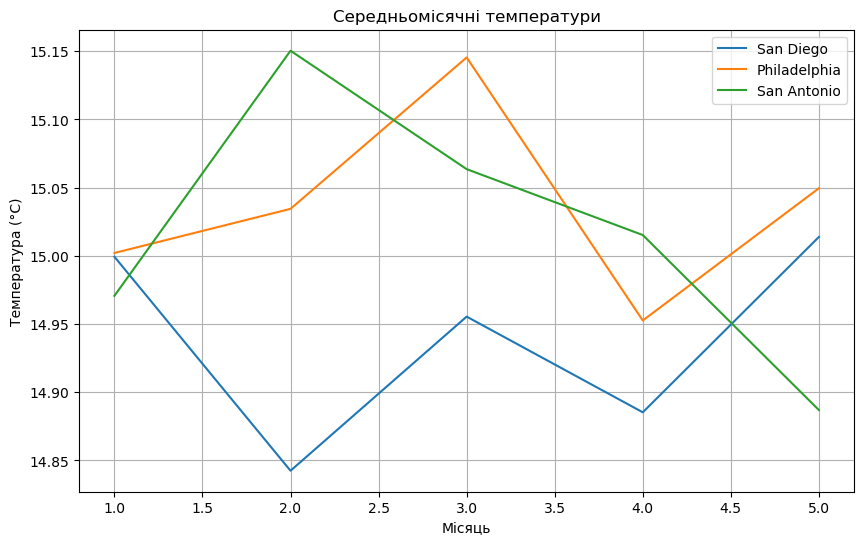

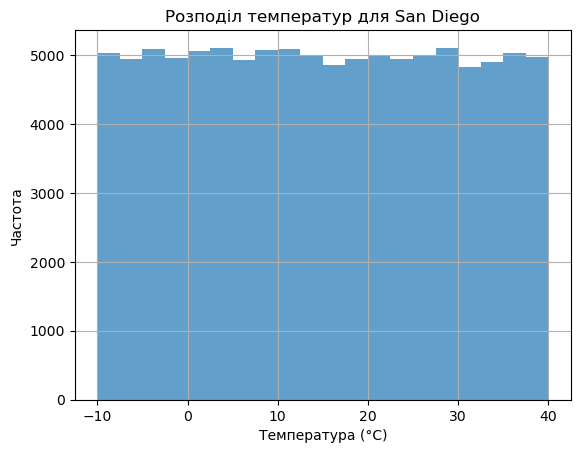

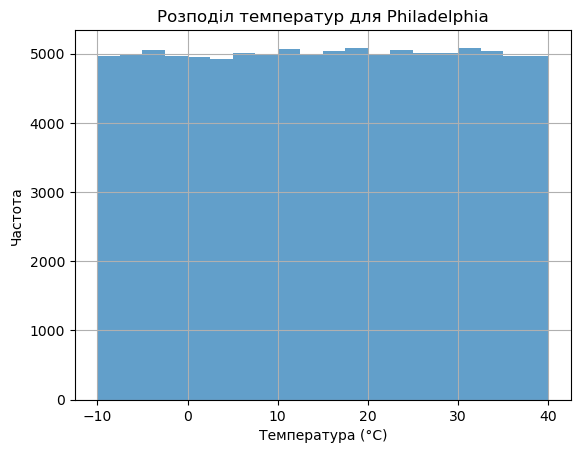

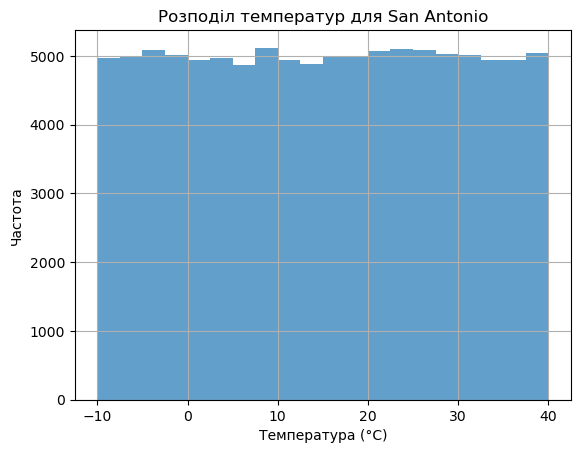

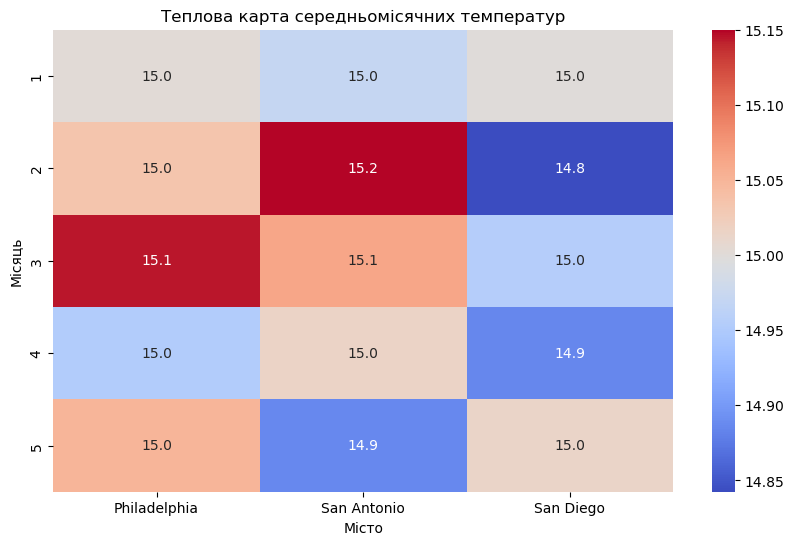

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('weather_data.csv')

print(data.head())

data.fillna(method='ffill', inplace=True)

data['Date_Time'] = pd.to_datetime(data['Date_Time'])

cities = ['San Diego', 'Philadelphia', 'San Antonio']  
filtered_data = data[data['Location'].isin(cities)]

filtered_data['year'] = filtered_data['Date_Time'].dt.year

annual_avg_temp = filtered_data.groupby(['Location', 'year'])['Temperature_C'].mean().reset_index()
print(annual_avg_temp)

filtered_data['month'] = filtered_data['Date_Time'].dt.month

monthly_avg_temp = filtered_data.groupby(['Location', 'month'])['Temperature_C'].mean().reset_index()

highest_months = monthly_avg_temp.loc[monthly_avg_temp.groupby('Location')['Temperature_C'].idxmax()]
lowest_months = monthly_avg_temp.loc[monthly_avg_temp.groupby('Location')['Temperature_C'].idxmin()]

print("Місяці з найвищими температурами:\n", highest_months)
print("Місяці з найнижчими температурами:\n", lowest_months)

last_10_years = filtered_data[filtered_data['year'] >= (filtered_data['year'].max() - 10)]

recent_annual_avg_temp = last_10_years.groupby(['Location', 'year'])['Temperature_C'].mean().reset_index()

trend = recent_annual_avg_temp.groupby('Location').agg({'Temperature_C': ['mean', 'std']})
print("Тренди зміни температури:\n", trend)


plt.figure(figsize=(10, 6))
for city in cities:
    city_data = monthly_avg_temp[monthly_avg_temp['Location'] == city]
    plt.plot(city_data['month'], city_data['Temperature_C'], label=city)

plt.title('Середньомісячні температури')
plt.xlabel('Місяць')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid()
plt.show()

# Гістограми розподілу температур
for city in cities:
    plt.figure()
    city_data = filtered_data[filtered_data['Location'] == city]
    plt.hist(city_data['Temperature_C'], bins=20, alpha=0.7)
    plt.title(f'Розподіл температур для {city}')
    plt.xlabel('Температура (°C)')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

# Теплова карта (heatmap) середньомісячних температур
heatmap_data = monthly_avg_temp.pivot_table(index='month', columns='Location', values='Temperature_C')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Теплова карта середньомісячних температур')
plt.xlabel('Місто')
plt.ylabel('Місяць')
plt.show()